In [0]:
import sys
import gym
import numpy as np
import random
import math
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

In [0]:
env = gym.make('CliffWalking-v0')

In [4]:
print(env.action_space)
print(env.observation_space)



Discrete(4)
Discrete(48)


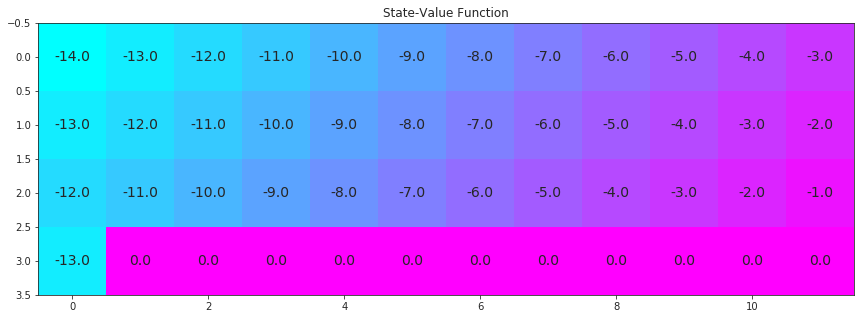

In [5]:
V_opt = np.zeros((4,12))
V_opt[0][0:13] = -np.arange(3, 15)[::-1]
V_opt[1][0:13] = -np.arange(3, 15)[::-1] + 1
V_opt[2][0:13] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)



In [0]:
def update_Q(alpha, gamma, Q, state, action, reward, next_state=None):
   
    current = Q[state][action] 
    v = np.max(Q[next_state]) if next_state is not None else 0 
    target = reward + (gamma * v)               
    new_value = current + (alpha * (target - current)) 
    return new_value

In [0]:
def q_learning(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    nA = env.action_space.n                
    Q = defaultdict(lambda: np.zeros(nA)) 
    
    tmp_scores = deque(maxlen=plot_every)    
    avg_scores = deque(maxlen=num_episodes)   
    
    for i_episode in range(1, num_episodes+1):
        
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        score = 0                                             
        state = env.reset()                                   
        eps = 1.0 / i_episode                                  
        
        while True:
            action = epsilon_greedy(Q, state, nA, eps)         
            next_state, reward, done, info = env.step(action)  
            score += reward                                    
            Q[state][action] = update_Q(alpha, gamma, Q,state, action, reward, next_state)        
            state = next_state                                 
            if done:
                tmp_scores.append(score)                       
                break
        if (i_episode % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
            
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))
    return Q

Episode 5000/5000

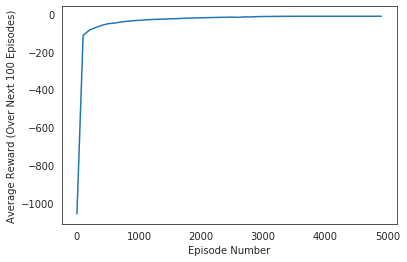

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 3  0  1  1  1  2  1  1  3  2  1  0]
 [ 0  1  1  1  1  3  2  1  1  2  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


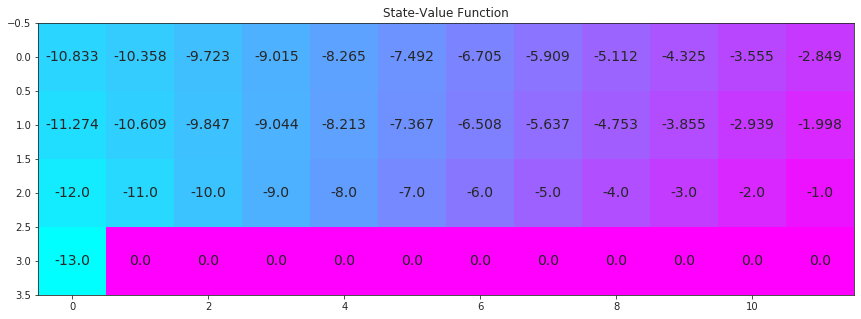

In [11]:

Q = q_learning(env, 5000, .01)
policy = np.array([np.argmax(Q[key]) if key in Q else -1 for key in np.arange(48)]).reshape((4,12))

check_test.run_check('td_control_check', policy)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy)


plot_values([np.max(Q[key]) if key in Q else 0 for key in np.arange(48)])